In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# road csv from folder
house = pd.read_csv('train.csv')

In [6]:
# Info about columns
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# Info about saleprice
house.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

c:\Users\hahav\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

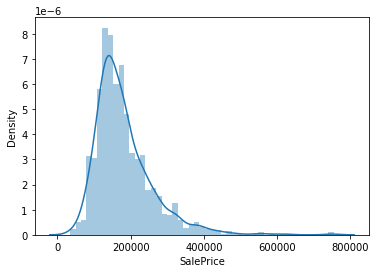

In [9]:
# histo about Saleprice
sns.distplot(house.SalePrice)

### relation with numerical variables

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

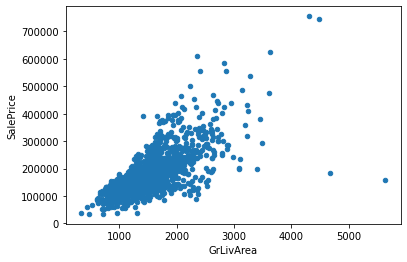

In [15]:
# relation about GrLivArea, saleprice
house.plot.scatter(y="SalePrice", x="GrLivArea")

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

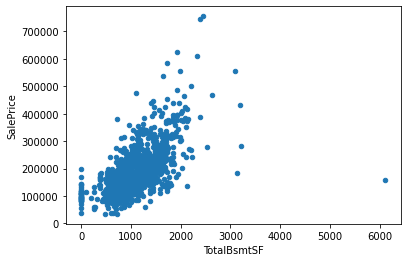

In [16]:
# relation about TotalBsmtSF, saleprice
house.plot.scatter(y="SalePrice", x="TotalBsmtSF")


### relation with categorical variables

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

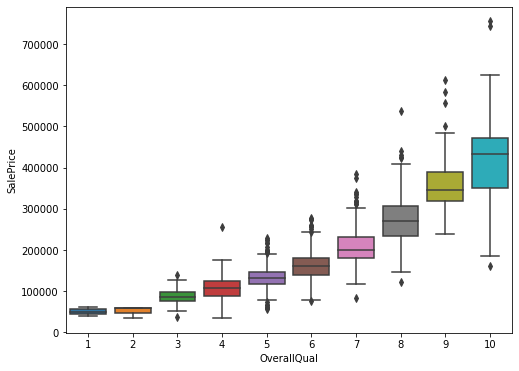

In [22]:
var = "OverallQual"
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=var, y="SalePrice", data=house)


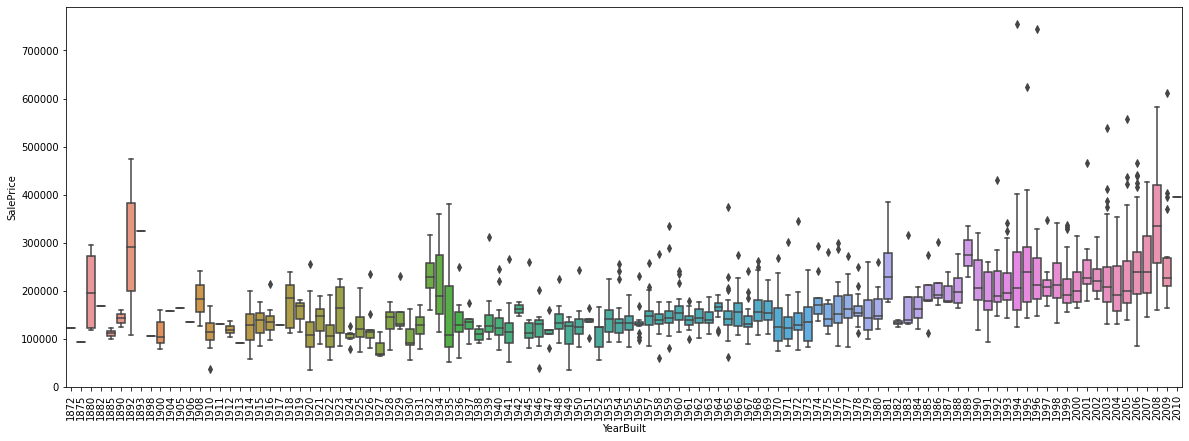

In [31]:
var = 'YearBuilt'
f, ax = plt.subplots(figsize=(20, 7))
sns.boxplot(x=var, y="SalePrice", data=house)
plt.xticks(rotation=90)
plt.show()

1. 결론적으로 GrLivArea와 TotalBsmtSF은 houseprice와 양의 상관 관계를 가지고 있다.

2. OverallQual와 YearBuilt saleprice와 역시 양의 선형관계를 가지고 있다.

### Correlation matrix (heatmap style)

<AxesSubplot:>

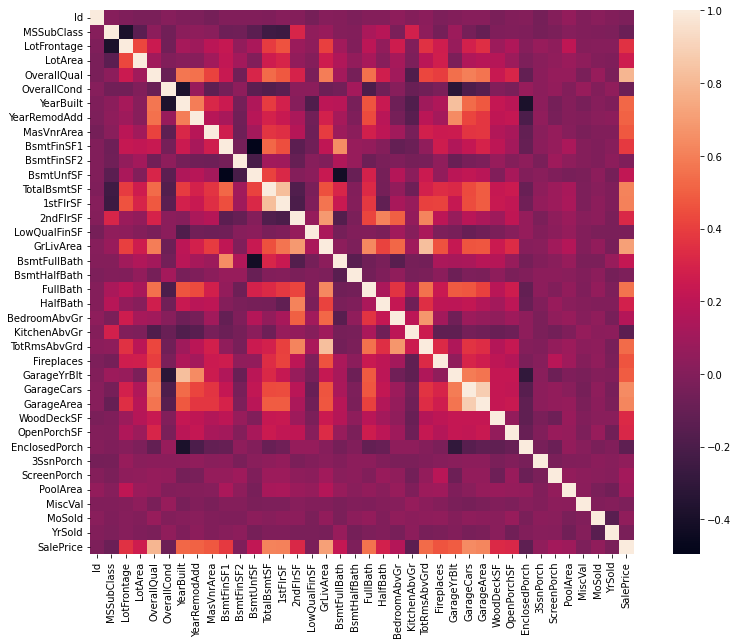

In [46]:
corrmat = house.corr()
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(cormat, square=True)

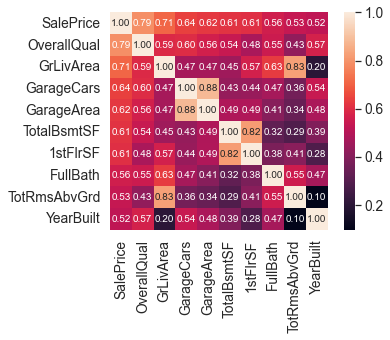

In [69]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

 결론
1. SalePrice와 OverQual, GrLivArea는 상관관계가 강력하다.
2. GarageCars와 GarageArea 또한 상관관계가 있지만 둘은 같은 속성을 띄고 있기 때문에 같은 변수라고 쳐도 무방하다.

### scatterplot Salepirce and variables

c:\Users\hahav\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


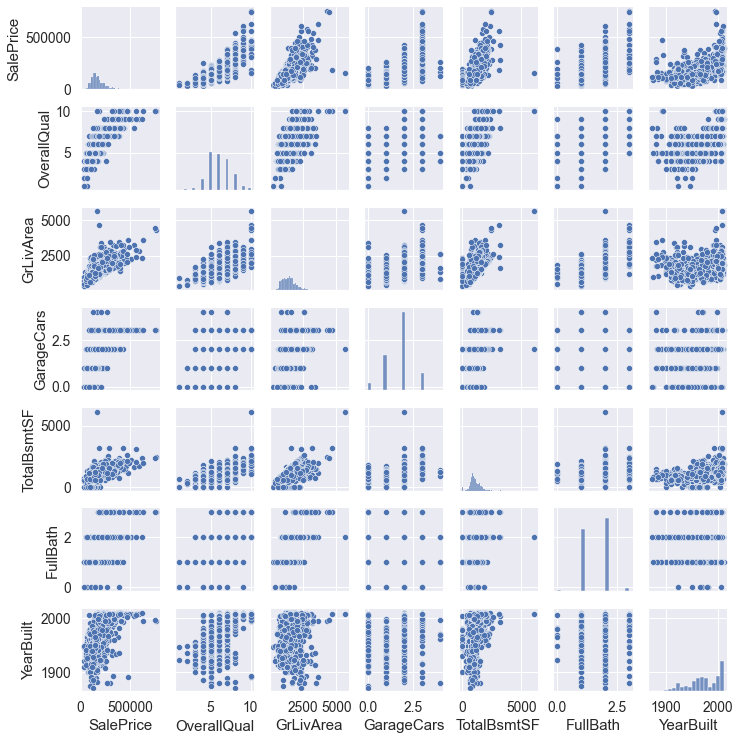

In [94]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size = 1.5, palette="Set2")